<a href="https://colab.research.google.com/github/cwilbar04/nba-predictions/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from google.cloud import bigquery
from datetime import datetime
import os

In [9]:
# from google.colab import auth
# auth.authenticate_user()
# print('Authenticated')

In [18]:
my_project_id = 'nba-predictions-dev'
model_table_name = 'nba.model_game'

In [11]:
%env GOOGLE_APPLICATION_CREDENTIALS C:\GCP\nba-predictions-dev-d76075f0a064.json

env: GOOGLE_APPLICATION_CREDENTIALS=C:\GCP\nba-predictions-dev-d76075f0a064.json


In [12]:
%env GOOGLE_CLOUD_PROJECT nba-predictions-dev

env: GOOGLE_CLOUD_PROJECT=nba-predictions-dev


In [13]:
credentials = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

In [89]:
client = bigquery.Client(project=my_project_id)

In [90]:
model = client.query('''
  SELECT
    *
  FROM
    `%s`
''' % (model_table_name)).to_dataframe()

In [24]:
model.describe()

,season,is_home_team,spread,pace,efg_pct,tov_pct,ft_rate,off_rtg,opponent_efg_pct,opponent_tov_pct,...,wma_10_opponent_off_rtg,incoming_wma_10_opponent_off_rtg,wma_10_starter_minutes_played_proportion,incoming_wma_10_starter_minutes_played_proportion,wma_10_bench_plus_minus,incoming_wma_10_bench_plus_minus,wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_opponnent_starter_minutes_played_proportion,wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_bench_plus_minus
count,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,...,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000,16712.000000
mean,2015.255864,0.499940,0.010531,96.393149,0.513459,12.535675,0.210367,109.034753,0.513367,12.533569,...,108.968268,108.949749,0.627816,0.627826,-1.906938,-1.909768,0.627755,0.627758,-1.949866,-1.949067
std,6.749800,0.500015,14.123429,5.690357,0.066731,3.484401,0.080066,11.629726,0.066792,3.481998,...,5.563451,5.563415,0.049122,0.049172,16.515124,16.513873,0.034208,0.034223,16.246417,16.243929
min,2000.000000,0.000000,-61.000000,72.600000,0.278000,1.000000,0.011000,65.300000,0.278000,1.000000,...,88.816364,88.816364,0.461068,0.461068,-135.309091,-135.309091,0.485263,0.485263,-85.200000,-85.200000
25%,2016.000000,0.000000,-9.000000,92.500000,0.467000,10.100000,0.154000,101.200000,0.467000,10.100000,...,105.287273,105.263636,0.594762,0.594754,-11.709091,-11.709091,0.604823,0.604809,-11.459091,-11.454545
50%,2018.000000,0.000000,1.000000,96.400000,0.512000,12.400000,0.202000,109.000000,0.512000,12.400000,...,109.092727,109.064545,0.626316,0.626303,-2.100000,-2.109091,0.626088,0.626096,-2.236364,-2.236364
75%,2019.000000,1.000000,9.000000,100.200000,0.558000,14.800000,0.259000,116.900000,0.558000,14.800000,...,112.787273,112.776818,0.659921,0.659931,7.672727,7.659091,0.648620,0.648595,7.531818,7.527273
max,2021.000000,1.000000,61.000000,117.200000,0.762000,27.800000,0.683000,154.000000,0.762000,27.800000,...,132.240000,132.240000,0.817108,0.817108,86.618182,86.618182,0.775327,0.775327,122.945455,122.945455


In [25]:
model.head()

,game_key,season,game_date,team,opponent,is_home_team,spread,pace,efg_pct,tov_pct,...,wma_10_opponent_off_rtg,incoming_wma_10_opponent_off_rtg,wma_10_starter_minutes_played_proportion,incoming_wma_10_starter_minutes_played_proportion,wma_10_bench_plus_minus,incoming_wma_10_bench_plus_minus,wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_opponnent_starter_minutes_played_proportion,wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_bench_plus_minus
0,IND20160426TOR600pa,2016,2016-04-26,Indiana Pacers,Toronto Raptors,0,-3,88.0,0.541,14.4,...,105.625455,103.514545,0.592034,0.570271,-7.200000,1.527273,0.577735,0.564633,4.963636,-3.963636
1,BOS20160426ATL830pa,2016,2016-04-26,Boston Celtics,Atlanta Hawks,0,-27,97.4,0.422,18.5,...,103.274545,101.389091,0.594357,0.604949,-2.181818,5.927273,0.657590,0.684604,-6.509091,-20.509091
2,BOS20160426ATL830ph,2016,2016-04-26,Atlanta Hawks,Boston Celtics,1,27,97.4,0.510,10.4,...,96.940000,99.354545,0.655408,0.685989,-4.345455,-19.527273,0.620607,0.641633,-8.036364,-1.309091
3,IND20160426TOR600ph,2016,2016-04-26,Toronto Raptors,Indiana Pacers,1,3,88.0,0.439,6.7,...,105.587273,103.954545,0.598875,0.591151,17.436364,12.454545,0.608726,0.595895,-20.054545,-16.254545
4,MIA20161125MEM800pa,2017,2016-11-25,Miami Heat,Memphis Grizzlies,0,9,88.9,0.459,7.9,...,103.141818,105.609091,0.579275,0.586230,0.745455,3.236364,0.602691,0.612428,-4.127273,-7.927273


In [43]:
model.columns.sort_values()

Index(['bench_plus_minus', 'efg_pct', 'ft_rate', 'game_date', 'game_key',
       'incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'is_home_team', 'is_win', 'off_rtg',
       'opponent', 'opponent_bench_plus_minus', 'opponent_efg_pct',
       'opponent_ft_rate', 'opponent_off_rtg', 'opponent_tov_pct',
       'opponnent_starter_minutes_played_proportion', 'pace', 'season',
       'spread', 'starter_minutes_played_proportion', 'streak_counter_is_win',
       'team', 'tov_pct', 'wma_10_bench_p

In [127]:
model.loc[x,'game_date'].strftime('%m-%d')

AttributeError: 'Series' object has no attribute 'strftime'

In [128]:
for x in range(len(model)):
    model.loc[x,'month'] = model.loc[x,'game_date'].month
    model.loc[x,'month-day'] = model.loc[x,'game_date'].strftime('%m-%d')

In [92]:
model_included = model[['spread','month','incoming_is_win_streak', 'incoming_wma_10_bench_plus_minus',
       'incoming_wma_10_efg_pct', 'incoming_wma_10_ft_rate',
       'incoming_wma_10_off_rtg', 'incoming_wma_10_opponent_bench_plus_minus',
       'incoming_wma_10_opponent_efg_pct', 'incoming_wma_10_opponent_ft_rate',
       'incoming_wma_10_opponent_off_rtg', 'incoming_wma_10_opponent_tov_pct',
       'incoming_wma_10_opponnent_starter_minutes_played_proportion',
       'incoming_wma_10_pace',
       'incoming_wma_10_starter_minutes_played_proportion',
       'incoming_wma_10_tov_pct', 'is_home_team']]

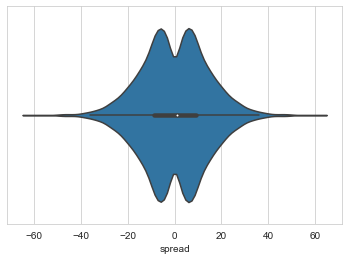

In [93]:
sns.set_style("whitegrid")
ax = sns.violinplot(data=model_included, x='spread', inner='box', orient='h')

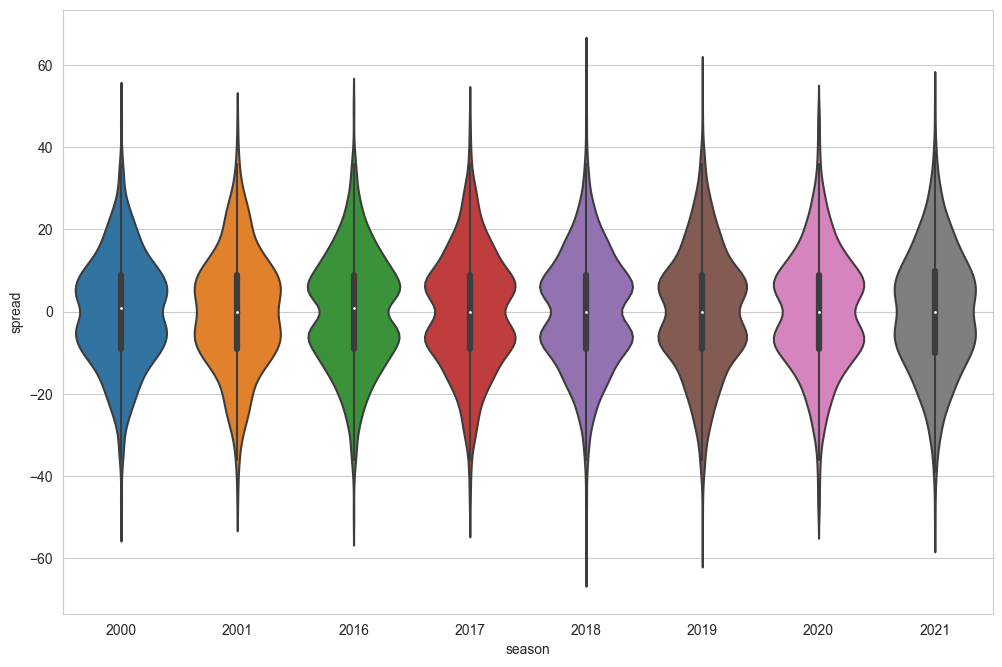

In [96]:
fig=plt.figure(figsize=(12,8), dpi= 100)
ax = sns.violinplot(data=model, x='season', y='spread', inner='box', orient='v')

No noticeable differences in spread between seasons

In [ ]:
fig=plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')

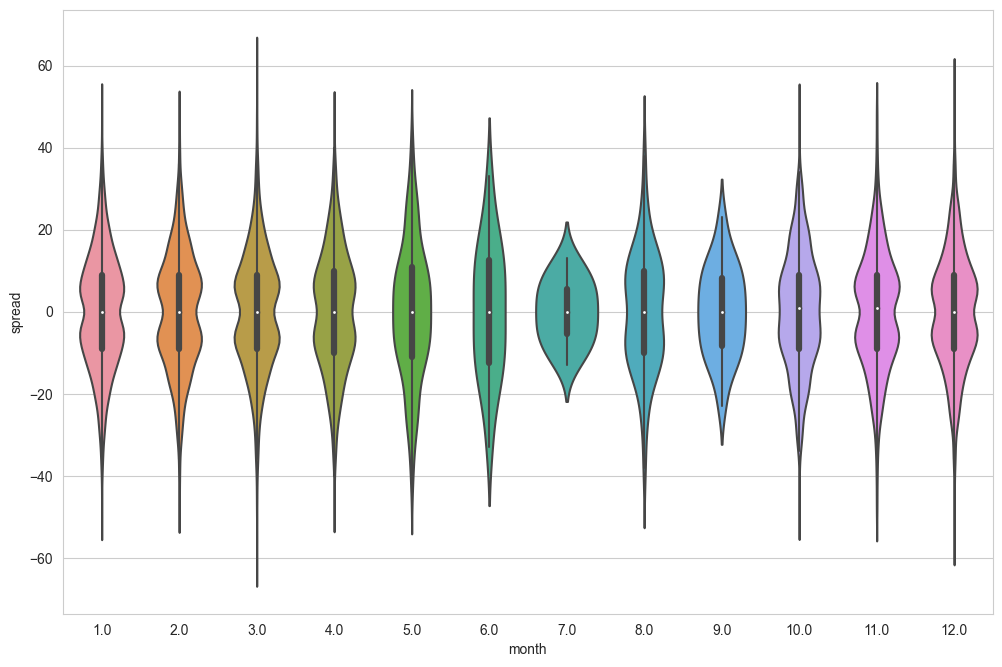

In [69]:
fig=plt.figure(figsize=(12,8), dpi= 100)
ax = sns.violinplot(data=model, x='month', y='spread', inner='box', orient='v')

No noticeable difference in spread between months, except perhaps July but there are just significantly less games in July since that is not usually an NBA month

In [77]:
model['spread'].value_counts().tail(30)

-38    14
-37    14
-46     7
 47     7
-47     7
 46     7
-40     6
-42     6
 40     6
 42     6
 48     5
-48     5
 41     4
 49     4
-45     4
-43     4
-44     4
 43     4
-49     4
 45     4
-41     4
 44     4
 50     3
-51     2
-50     2
 51     2
-61     1
-56     1
 56     1
 61     1
Name: spread, dtype: int64

In [80]:
# Consider excluding from our data any spread that occurs less than 370 times (3 sigma) or 22 times (2 sigma) rules, representing outliers - almost all rare blow out games
# counts = model_included['spread'].value_counts()
# model_included = model_included.loc[model_included['spread'].isin(counts[counts > 5].index), :]

In [87]:
# # rewrite SQL query for getting data 
# model_included['spread'].value_counts()

 7     538
-7     535
 5     530
-5     529
 8     527
      ... 
 47      7
 42      6
 40      6
-40      6
-42      6
Name: spread, Length: 86, dtype: int64

In [85]:

# model = client.query('''
#   SELECT
#     spread, incoming_is_win_streak, incoming_wma_10_bench_plus_minus,
#        incoming_wma_10_efg_pct, incoming_wma_10_ft_rate,
#        incoming_wma_10_off_rtg, incoming_wma_10_opponent_bench_plus_minus,
#        incoming_wma_10_opponent_efg_pct, incoming_wma_10_opponent_ft_rate,
#        incoming_wma_10_opponent_off_rtg, incoming_wma_10_opponent_tov_pct,
#        incoming_wma_10_opponnent_starter_minutes_played_proportion,
#        incoming_wma_10_pace,
#        incoming_wma_10_starter_minutes_played_proportion,
#        incoming_wma_10_tov_pct, is_home_team
#   FROM
#     `%s`
#   WHERE spread in 
#       (SELECT distinct spread FROM `%s` GROUP BY spread HAVING count(1) > 5) 
# ''' % (model_table_name,model_table_name)).to_dataframe()

In [97]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 50 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   game_key                                                     16712 non-null  object 
 1   season                                                       16712 non-null  int64  
 2   game_date                                                    16712 non-null  object 
 3   team                                                         16712 non-null  object 
 4   opponent                                                     16712 non-null  object 
 5   is_home_team                                                 16712 non-null  int64  
 6   spread                                                       16712 non-null  int64  
 7   pace                                                         16712 non-null 

In [110]:
model_included.drop(columns='spread')

,month,incoming_is_win_streak,incoming_wma_10_bench_plus_minus,incoming_wma_10_efg_pct,incoming_wma_10_ft_rate,incoming_wma_10_off_rtg,incoming_wma_10_opponent_bench_plus_minus,incoming_wma_10_opponent_efg_pct,incoming_wma_10_opponent_ft_rate,incoming_wma_10_opponent_off_rtg,incoming_wma_10_opponent_tov_pct,incoming_wma_10_opponnent_starter_minutes_played_proportion,incoming_wma_10_pace,incoming_wma_10_starter_minutes_played_proportion,incoming_wma_10_tov_pct,is_home_team
0,4.0,1.0,1.527273,0.498382,0.247073,106.952727,-3.963636,0.463382,0.237164,103.514545,13.720000,0.564633,91.680000,0.570271,13.585455,0
1,4.0,2.0,5.927273,0.462982,0.206400,101.954545,-20.509091,0.483909,0.181945,101.389091,12.456364,0.684604,96.772727,0.604949,11.178182,0
2,4.0,-2.0,-19.527273,0.475273,0.184309,98.260000,-1.309091,0.470382,0.185273,99.354545,12.772727,0.641633,98.578182,0.685989,13.327273,1
3,4.0,-1.0,12.454545,0.474673,0.227127,107.901818,-16.254545,0.476218,0.242382,103.954545,11.905455,0.595895,90.167273,0.591151,12.341818,1
4,11.0,-2.0,3.236364,0.459691,0.183127,101.100000,-7.927273,0.495673,0.196673,105.609091,12.861818,0.612428,92.956364,0.586230,12.354545,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16707,1.0,1.0,6.090909,0.531091,0.150964,113.203636,-15.618182,0.509891,0.237818,107.638182,13.236364,0.648320,100.530909,0.647222,11.432727,1
16708,4.0,-1.0,-16.127273,0.498709,0.176964,104.800000,6.600000,0.509873,0.209727,110.452727,11.201818,0.575330,97.196364,0.526843,12.249091,0
16709,4.0,17.0,30.818182,0.567364,0.157582,119.483636,-51.272727,0.503018,0.189000,102.081818,13.443636,0.543438,102.523636,0.556115,10.670909,1
16710,4.0,1.0,-4.200000,0.546618,0.168491,109.430909,-17.418182,0.531818,0.172327,111.372727,11.750909,0.603843,98.034545,0.609212,13.380000,1


<Figure size 1440x720 with 0 Axes>

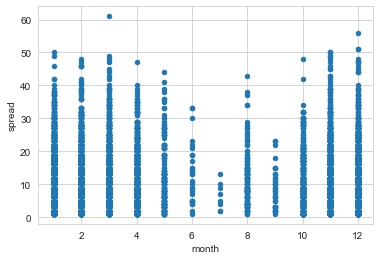

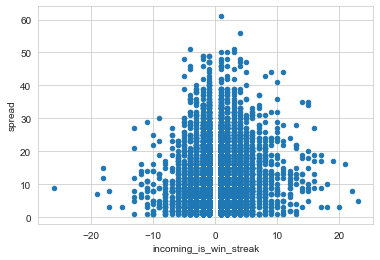

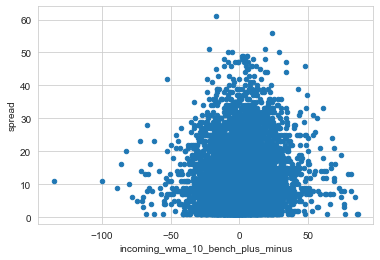

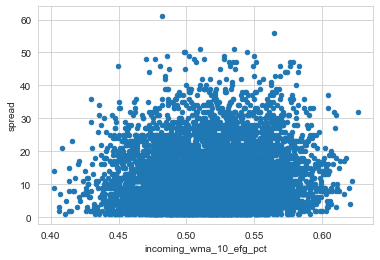

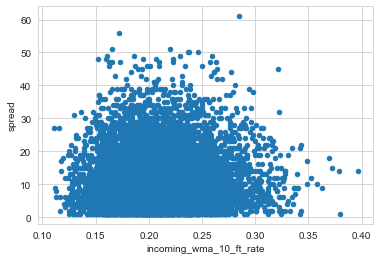

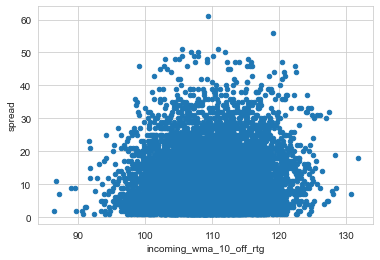

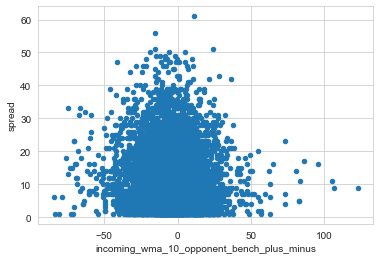

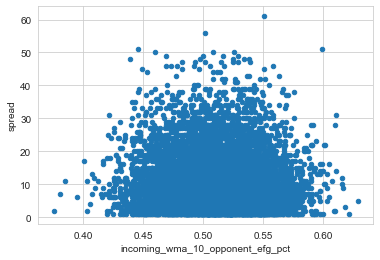

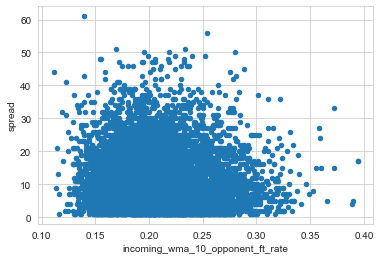

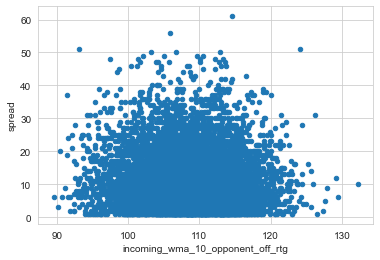

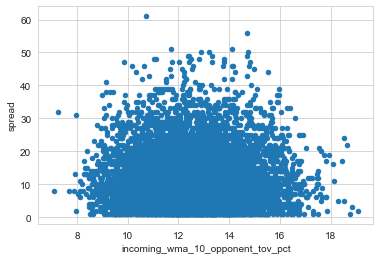

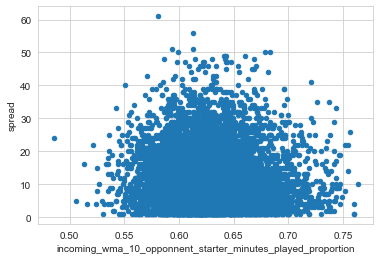

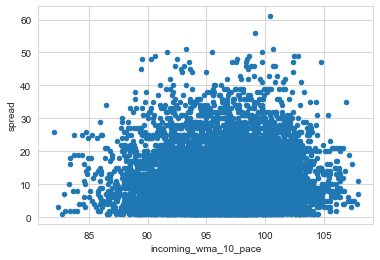

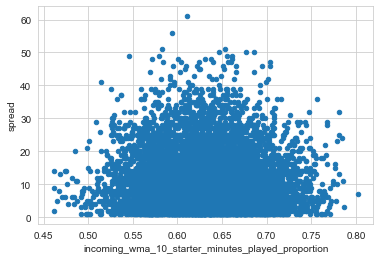

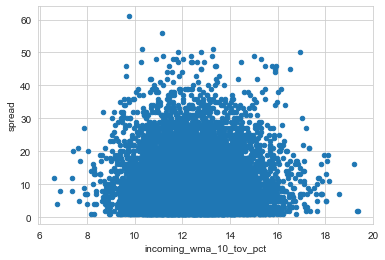

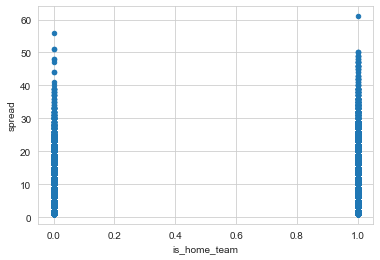

In [116]:
plt.figure(figsize=(20,10))
columns = 4
for col in model_included.drop(columns='spread'):
    new_model = model_included[model_included['spread']>0].sort_values(by = col)
    ax = new_model.plot(kind='scatter', x=col, y='spread')

In [130]:
## Check distribution of number of games per day
model['month-day'].value_counts()

12-23    168
02-06    144
02-08    142
02-01    142
11-25    136
        ... 
09-30      2
06-06      2
09-12      2
06-14      2
09-27      2
Name: month-day, Length: 298, dtype: int64

In [121]:
model['month-day']

0        30.0
1        30.0
2        30.0
3        30.0
4        36.0
         ... 
16707     7.0
16708    20.0
16709    20.0
16710    20.0
16711    20.0
Name: month-day, Length: 16712, dtype: float64

In [ ]:
## Choose to split train/test by date
## Create table with random 70% of days in data set